In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.segmentation
import matplotlib.pyplot as plt
import skimage.measure
import skfmm
import scipy.ndimage.morphology
import scipy.ndimage.sobel

(500, 500, 3)


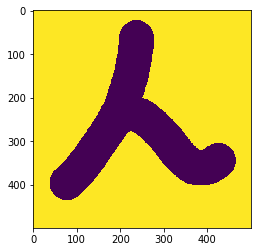

In [99]:
img = cv2.imread('sample.png', 3)
print(img.shape)
mask = (img[:, :, 0] < 255)
plt.imshow(mask)
plt.show()

Components:  3


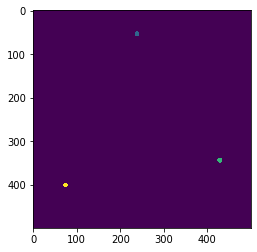

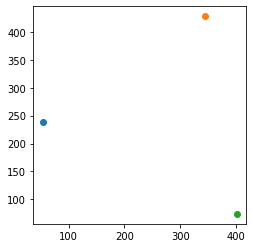

In [100]:
# get point list from connected components in channel 2
labels, num_labels = skimage.measure.label(img[:, :,2]>0, return_num=True)

points = []
for i in range(num_labels):
    M = skimage.measure.moments(labels==i+1)
    centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
    points.append(centroid)

print('Components: ', num_labels)
plt.imshow(labels)
plt.show()

fig, ax = plt.subplots()
for p in points:
    ax.plot(p[0], p[1], 'o')
plt.gca().set_aspect(1)
plt.show()

In [101]:
n=500
X, Y = np.meshgrid(np.linspace(-1,1,n), np.linspace(-1,1,n))

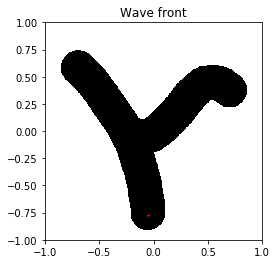

In [111]:
# Zero level of phi define wave front contour.
phi = -1 * np.ones_like(mask)
# Point source.
phi[int(points[0][0]), int(points[0][1])] = 1.0
# Linear wavefront.
#phi[100, : ]=1.0
# Define boundaries (outside V=0).
phi  = np.ma.MaskedArray(phi, mask)

fig, ax = plt.subplots()
ax.pcolor(X, Y, phi.mask, cmap='gray')
ax.contour(X, Y, phi, levels=[0.0], colors='red', linewidths=(3))
ax.set_title('Wave front')
plt.gca().set_aspect(1)
plt.show()

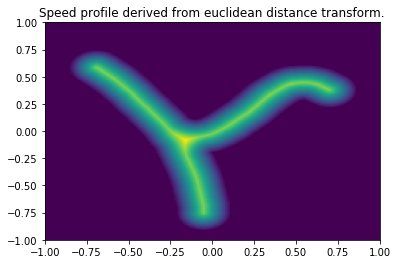

In [122]:
# Euclidean distance transform.
edt = scipy.ndimage.morphology.distance_transform_edt(~mask)

fig, ax = plt.subplots()
ax.pcolor(X, Y, edt)
ax.set_title('Speed profile derived from euclidean distance transform.')
plt.show()

In [123]:
# Scalar field with normal velocities of the wave front.
# Uniform velocity field.
V = np.ones_like(mask)
# Velocity derived from euclidean distance.
V = edt

In [124]:
# Calculate distance and travel time for each point.
d = skfmm.distance(phi, dx=2.0/n)
T = skfmm.travel_time(phi, V, dx=2.0/n)

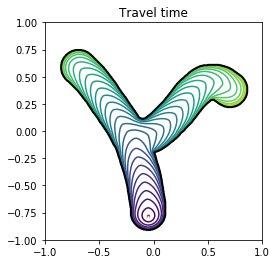

In [129]:
fig, ax = plt.subplots()
#CS = ax.contour(X, Y, phi)
ax.contour(X, Y, T, 30)
ax.contour(X, Y, phi, levels=[0], colors='red', linewidths=(3))
ax.contour(X, Y, phi.mask, levels=[0.5], colors='black', linewidths=(2))
ax.set_title('Travel time')
plt.gca().set_aspect(1)
plt.show()

(500, 500)


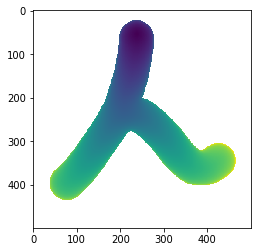

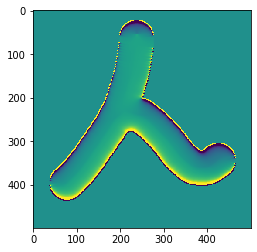

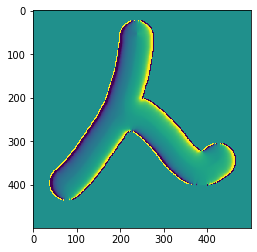

In [147]:
# Calculate gradient of T(x) with Sobel filter.
gradTx = scipy.ndimage.sobel(T,axis=0)
gradTy = scipy.ndimage.sobel(T,axis=1)
print(gradTx.shape)
plt.imshow(T)
plt.show()
plt.imshow(gradTx, vmin=-0.005, vmax=0.005)
plt.show()
plt.imshow(gradTy, vmin=-0.005, vmax=0.005)
plt.show()

[344. 428.]


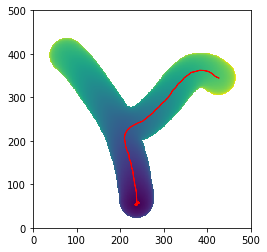

0.0006105462677384757


In [203]:
p_start = np.array(points[1])

p_hist = [p_start]


fig, ax = plt.subplots()
ax.set(xlim=(0, 500), ylim=(0, 500))
ax.imshow(T)


p = p_start
print(p)
for i in range(100):
    
    grad = np.array([gradTx[int(p[0]), int(p[1])],
                     gradTy[int(p[0]), int(p[1])]])
    step = 10.0
    delta= -grad/np.linalg.norm(grad)*step
    ax.arrow(p[1], p[0], delta[1], delta[0], color='red')
    p_new = p + delta
    p_hist.append(p_new)
    p = p_new

plt.gca().set_aspect(1)
plt.show()

print(gradTx[int(p[0]), int(p[1])])